# Modeling and Prediction for Movies

<img src="images/movies.jpg"/>

## Setup

### Load Libraries

In [1]:
#install.packages("package")
library(statsr)
library(dplyr)
library(ggplot2)
library(gridExtra)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




### Load Data

In [2]:
load("data/movies.Rdata")
head(movies)

title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,⋯,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
<chr>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Filly Brown,Feature Film,Drama,80,R,Indomina Media Inc.,2013,4,19,2013,⋯,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
The Dish,Feature Film,Drama,101,PG-13,Warner Bros. Pictures,2001,3,14,2001,⋯,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
Waiting for Guffman,Feature Film,Comedy,84,R,Sony Pictures Classics,1996,8,21,2001,⋯,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
The Age of Innocence,Feature Film,Drama,139,PG,Columbia Pictures,1993,10,1,2001,⋯,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
Malevolence,Feature Film,Horror,90,R,Anchor Bay Entertainment,2004,9,10,2005,⋯,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/
Old Partner,Documentary,Documentary,78,Unrated,Shcalo Media Group,2009,1,15,2010,⋯,no,no,Chung-ryoul Lee,Choi Won-kyun,Lee Sam-soon,Moo,NA,NA,http://www.imdb.com/title/tt1334549/,//www.rottentomatoes.com/m/old-partner/


## Part 1: Data

In [3]:
str(movies)

tibble [651 x 32] (S3: tbl_df/tbl/data.frame)
 $ title           : chr [1:651] "Filly Brown" "The Dish" "Waiting for Guffman" "The Age of Innocence" ...
 $ title_type      : Factor w/ 3 levels "Documentary",..: 2 2 2 2 2 1 2 2 1 2 ...
 $ genre           : Factor w/ 11 levels "Action & Adventure",..: 6 6 4 6 7 5 6 6 5 6 ...
 $ runtime         : num [1:651] 80 101 84 139 90 78 142 93 88 119 ...
 $ mpaa_rating     : Factor w/ 6 levels "G","NC-17","PG",..: 5 4 5 3 5 6 4 5 6 6 ...
 $ studio          : Factor w/ 211 levels "20th Century Fox",..: 91 202 167 34 13 163 147 118 88 84 ...
 $ thtr_rel_year   : num [1:651] 2013 2001 1996 1993 2004 ...
 $ thtr_rel_month  : num [1:651] 4 3 8 10 9 1 1 11 9 3 ...
 $ thtr_rel_day    : num [1:651] 19 14 21 1 10 15 1 8 7 2 ...
 $ dvd_rel_year    : num [1:651] 2013 2001 2001 2001 2005 ...
 $ dvd_rel_month   : num [1:651] 7 8 8 11 4 4 2 3 1 8 ...
 $ dvd_rel_day     : num [1:651] 30 28 21 6 19 20 18 2 21 14 ...
 $ imdb_rating     : num [1:651] 5.5 7.3 7.6 7.

#### Sample
The sample data set is comprised of 651 randomly sampled movies produced and released before 2016. Some of the variables provide descriptive information that would not be use full in a data exploration or a linear regression analysis. For example:  Title of the movie, link to IMDB or link to rottentomatoes.

#### Methodology
The data collection methodology is not explicitly stated, but it is evident that the data is purely observational. Random sampling was involved but random assignement of treatment was not done therefore we cannot make any causality study. Only generalization is allowed for the conclusion reached in this analysis.

## Part 2: Research question

Let us first select the variables from the sample data given that will be of import to our discussion of a given movie's reception by audience.

- imdb_rating: Rating on IMDB
- critics_rating: Categorical variable for critics rating on Rotten Tomatoes (Certified Fresh, Fresh, Rotten)
- critics_score: Critics score on Rotten Tomatoes
- audience_rating: Categorical variable for audience rating on Rotten Tomatoes (Spilled, Upright)
- audience_score: Audience score on Rotten Tomatoes
- best_actor_win: Whether or not one of the main actors in the movie ever won an Oscar (no, yes)
- best_actress_win: Whether or not one of the main actresses in the movie ever won an Oscar (no, yes)
- best_dir_win: Whether or not the director of the movie ever won an Oscar (no, yes)

I have discared variables like: title, genre, run time, time of release etc. because these do not intutively seem to be key ingredients of a movies success.

The question that I will pose for this study is

##### Is there a association between the rating of a movie with other film charateristics: actors, actress, directors who won an oscar and, critics and audience reception of the movie.

One important thing to note here is that I have not yet selcted the exact response variable that I will use to quantify the rating. In the data Exploration, I will research further the 5 rating/scoring varibales, before settling on a final response variable.

## Part 3: Exploratory data analysis

Let us begin by first constructing a subset from the original dataset by selecting the variables that we find interesting. Susequently we will remove the incomplete entries. Also, I will be constructing a new variable: oscar_win that will track weather actor, actress or director involved in the moview has had an oscar win.

In [4]:
# Select interesting columns
mv <- movies %>% 
        select(imdb_rating, imdb_num_votes, critics_rating, critics_score, audience_score, audience_rating, best_actor_win, 
               best_actress_win, best_dir_win )

head(mv)

imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_score,audience_rating,best_actor_win,best_actress_win,best_dir_win
<dbl>,<int>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
5.5,899,Rotten,45,73,Upright,no,no,no
7.3,12285,Certified Fresh,96,81,Upright,no,no,no
7.6,22381,Certified Fresh,91,91,Upright,no,no,no
7.2,35096,Certified Fresh,80,76,Upright,yes,no,yes
5.1,2386,Rotten,33,27,Spilled,no,no,no
7.8,333,Fresh,91,86,Upright,no,no,no


In [5]:
# Let's exclude NA's.
mv <- na.exclude(mv)

In [6]:
summary(mv)

  imdb_rating    imdb_num_votes           critics_rating critics_score   
 Min.   :1.900   Min.   :   180   Certified Fresh:135    Min.   :  1.00  
 1st Qu.:5.900   1st Qu.:  4546   Fresh          :209    1st Qu.: 33.00  
 Median :6.600   Median : 15116   Rotten         :307    Median : 61.00  
 Mean   :6.493   Mean   : 57533                          Mean   : 57.69  
 3rd Qu.:7.300   3rd Qu.: 58301                          3rd Qu.: 83.00  
 Max.   :9.000   Max.   :893008                          Max.   :100.00  
 audience_score  audience_rating best_actor_win best_actress_win best_dir_win
 Min.   :11.00   Spilled:275     no :558        no :579          no :608     
 1st Qu.:46.00   Upright:376     yes: 93        yes: 72          yes: 43     
 Median :65.00                                                               
 Mean   :62.36                                                               
 3rd Qu.:80.00                                                               
 Max.   :97.00

In [7]:
# New variable: 'oscar_win'
mv <- mutate(mv, oscar_win = ifelse(best_actor_win == "yes", "yes", 
                             ifelse(best_actress_win == "yes", "yes", 
                             ifelse(best_dir_win == "yes", "yes", "no"))))

head(mv)

imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_score,audience_rating,best_actor_win,best_actress_win,best_dir_win,oscar_win
<dbl>,<int>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<chr>
5.5,899,Rotten,45,73,Upright,no,no,no,no
7.3,12285,Certified Fresh,96,81,Upright,no,no,no,no
7.6,22381,Certified Fresh,91,91,Upright,no,no,no,no
7.2,35096,Certified Fresh,80,76,Upright,yes,no,yes,yes
5.1,2386,Rotten,33,27,Spilled,no,no,no,no
7.8,333,Fresh,91,86,Upright,no,no,no,no


Now let us focus our attention to the 5 variables that are used for scoring a movie:

- imdb_rating
- critics_rating
- critics_score
- audience_rating
- audience_score

Two of these variables: critics_rating and audience_rating are factor variables. These are too coarse as response variables therefore, I will be discarding them as vaiable choices. Focusing on the remaining variables:

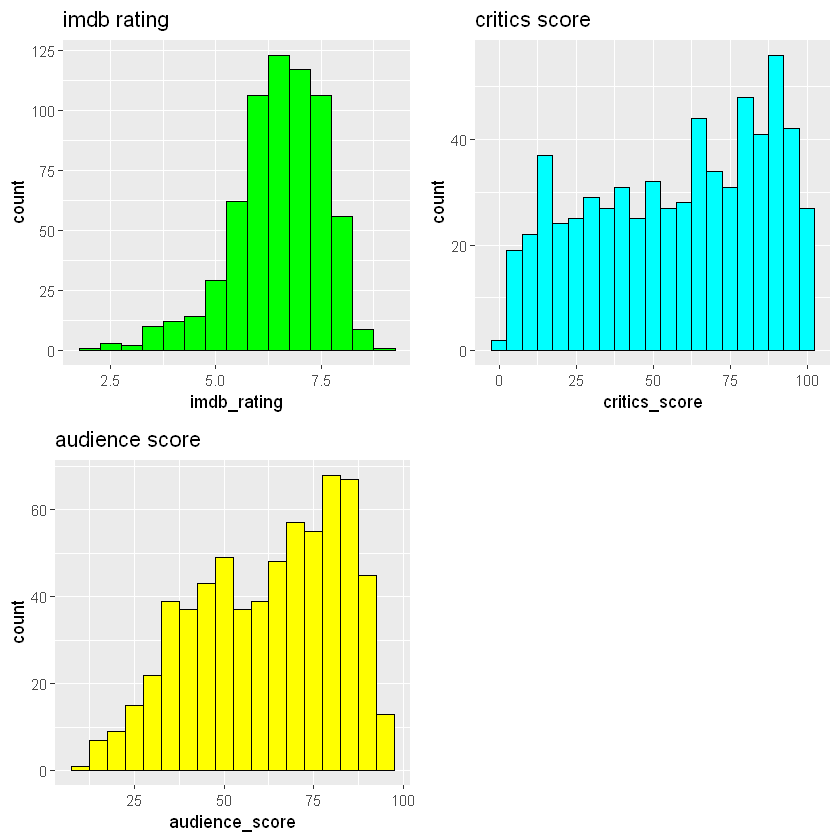

In [8]:
pA <- ggplot(data = mv, aes(x = imdb_rating)) + geom_histogram(colour = "black", fill = "green", binwidth = .5) + 
        ggtitle("imdb rating")

pB <- ggplot(data = mv, aes(x = critics_score)) + geom_histogram(colour = "black", fill = "cyan", binwidth = 5) + 
        ggtitle("critics score")

pC <- ggplot(data = mv, aes(x = audience_score)) + geom_histogram(colour = "black", fill = "yellow", binwidth = 5) + 
        ggtitle("audience score")

grid.arrange(pA, pB, pC, nrow = 2, ncol = 2)

imdb_rating seems to the variable that is closest to having a normal distribution, though left skewed, amongst the selected scoring schemes. Let us select imdb_rating as our response variable and proceed with observing what type of relationship it holds with the set of explanatory variables we wish to include in our study.

- imdb_rating and critics_score faceted by critics_rating
- imdb_rating and critics_score faceted by oscar win
- imdb_rating and audience_score faceted by audience_rating
- imdb_rating and audience_score faceted by oscar win.

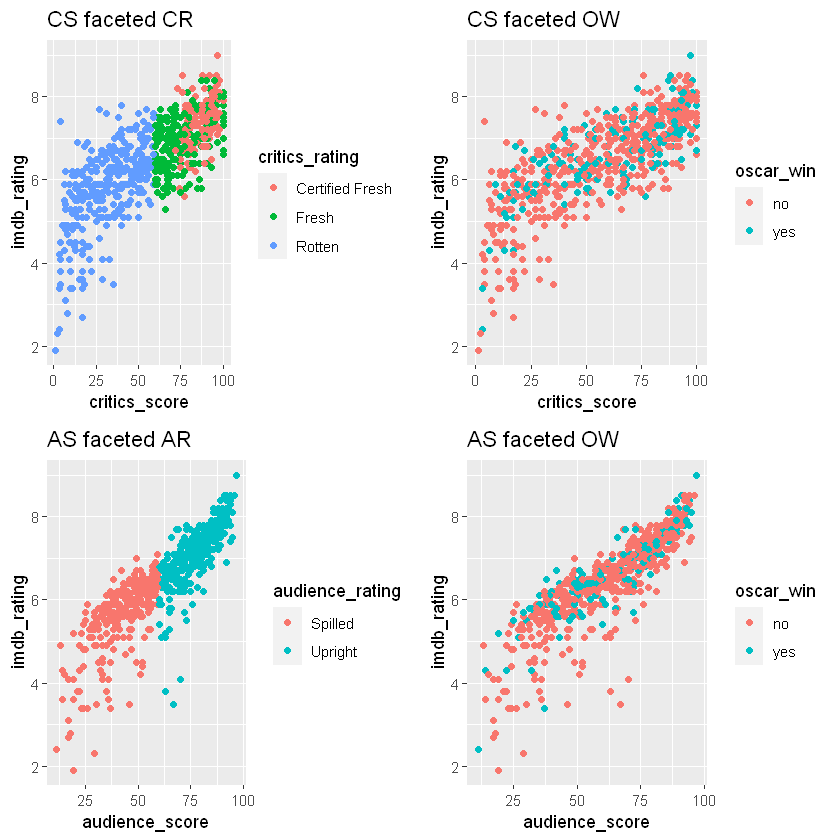

In [9]:
pA <- ggplot(data = mv, aes(y = imdb_rating, x = critics_score, colour = critics_rating)) + geom_point() +
        ggtitle("CS faceted CR")

pB <- ggplot(data = mv, aes(y = imdb_rating, x = critics_score, colour = oscar_win)) + geom_point() +
        ggtitle("CS faceted OW")

pC <- ggplot(data = mv, aes(y = imdb_rating, x = audience_score, colour = audience_rating)) + geom_point() +
        ggtitle("AS faceted AR")

pD <- ggplot(data = mv, aes(y = imdb_rating, x = audience_score, colour = oscar_win)) + geom_point() +
        ggtitle("AS faceted OW")

grid.arrange(pA, pB, pC, pD, nrow = 2, ncol = 2)

The graphs bring forward a few caveats:

- The relationship imdb_rating has with audience_score and critics_score is fairly strong. 
- Oscar win of  moview doesnt really hold much sway in terms of its scoring as oscar wins are randomly distributed across the scroring grids. It will be interesting to how adjusted R squared changes with oscar_win.

## Part 4: Modeling

 - imdb_rating is choosen as a response variable as it behaves closest to a normally distributed variable
 - critics_score is choosen as one of the explanatory variable as it clearly holds a string relationship with our response variable
 - audience_score is choosen as a second explanatory variable as it is also having a strong relationship with our response variable
 - oscarr_win will be added to our initial model to see how it impacts R squared and to check if it has a signifiant relationship with our response variable

In [10]:
success_formula <- lm(imdb_rating ~ audience_score + critics_score, data = mv)

summary(success_formula)


Call:
lm(formula = imdb_rating ~ audience_score + critics_score, data = mv)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.51964 -0.19767  0.03466  0.30671  1.22691 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.647241   0.062471   58.38   <2e-16 ***
audience_score 0.034703   0.001340   25.90   <2e-16 ***
critics_score  0.011816   0.000954   12.39   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4904 on 648 degrees of freedom
Multiple R-squared:  0.7962,	Adjusted R-squared:  0.7956 
F-statistic:  1266 on 2 and 648 DF,  p-value: < 2.2e-16


Now lets us introduce oscar_win and see how our model changes.

In [11]:
success_formula2 <- lm(imdb_rating ~ audience_score + critics_score + oscar_win, data = mv)

summary(success_formula2)


Call:
lm(formula = imdb_rating ~ audience_score + critics_score + oscar_win, 
    data = mv)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49681 -0.22093  0.01665  0.29947  1.25836 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.6178504  0.0628465  57.566  < 2e-16 ***
audience_score 0.0348138  0.0013321  26.135  < 2e-16 ***
critics_score  0.0116088  0.0009506  12.213  < 2e-16 ***
oscar_winyes   0.1312405  0.0435431   3.014  0.00268 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4874 on 647 degrees of freedom
Multiple R-squared:  0.7991,	Adjusted R-squared:  0.7981 
F-statistic: 857.6 on 3 and 647 DF,  p-value: < 2.2e-16


We do see a improvement in our models adjusted R-squared, but the improvement is miniscule. This is to be expected as predicted by the graphical analysis in Data Exploratory section. Therefore we choose our Linear Regression equation as:

    imdb_rating = 3.3.618 + 0.0348*audience_score + 0.0116*critics_score + 0.13124*oscar_winyes

## Model Interpretation

Intercept(3.62) : Predicted mean when all other variables take a value of zero. Like in most cases, the intercept in this case is not carrying much real world meaning, but is simply for a model fit.

Coefficient for audience_score(0.0348): With all other variables held constant, per unit increase in audience_score will improve the imdb_rating by 0.0348. 

Coefficient for critics_score(0.0116):With all other variables held constant, per unit increase in critics_score will improve the imdb_rating by 0.0348.

Coefficient for oscar(0.1312): With all other variables else held constant, imdb_rating for movies with at least one member of the cast (actor, actress, or director) with an Oscar award is 0.13 points higher than movies with cast that have no Oscar wins.

## Conditions Check for Linear Regresion

### Linear relationships between (numerical) x and y 
Check: Each (numerical) explanatory variable linearly related to the response variable. Check using residuals plots.

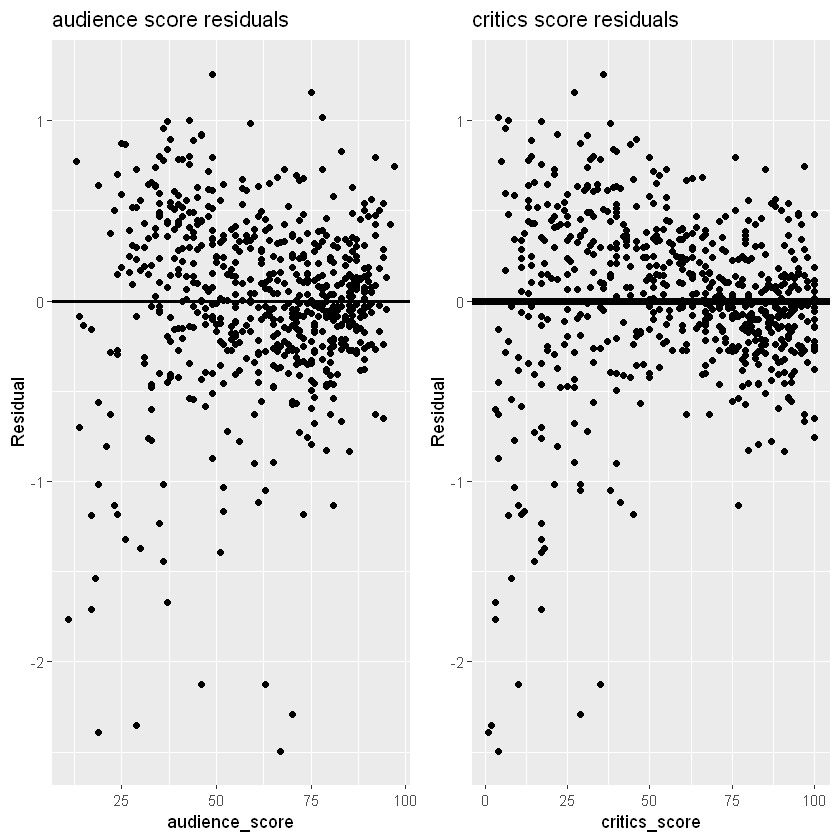

In [12]:
t1 <-  ggplot(data = mv, aes(x = audience_score, y = resid(success_formula2))) + geom_hline(yintercept = 0, size = 1)  + 
            xlab("audience_score") + ylab("Residual") + geom_point() + ggtitle("audience score residuals")

t2 <-  ggplot(data = mv, aes(x = critics_score, y = resid(success_formula2))) + geom_hline(yintercept = 0, size = 2)  + 
            xlab("critics_score") + ylab("Residual") + geom_point() + ggtitle("critics score residuals")

grid.arrange(t1, t2, nrow = 1, ncol = 2)

#### Independent and nearly normal residuals with mean 0
Check: Nearly normal distribution of residuals centered at 0. Check using histogram or normal probability plot:

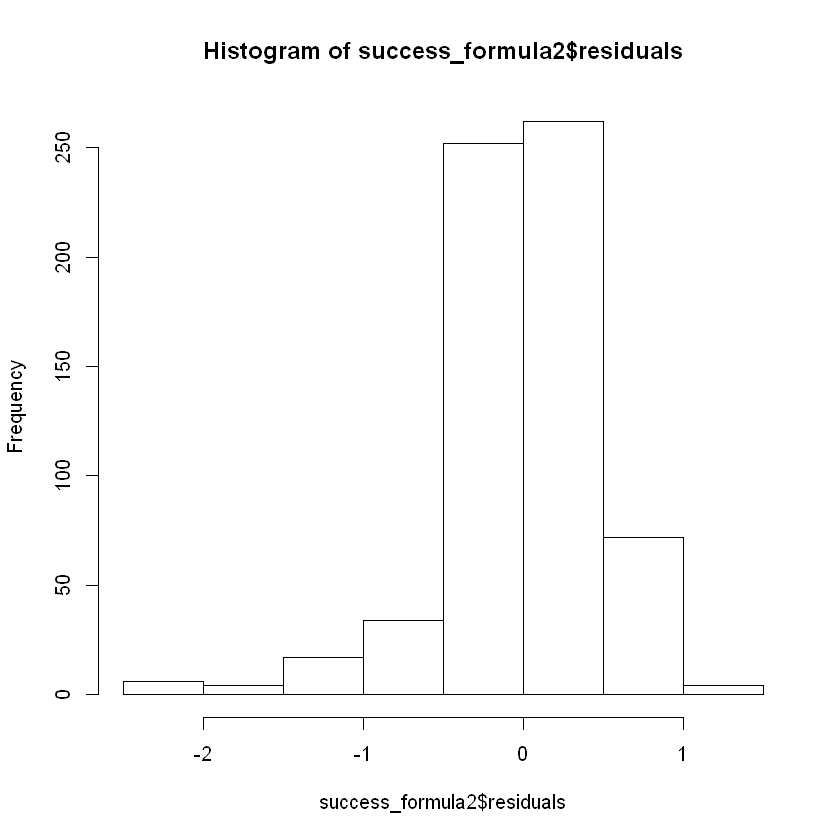

In [13]:
hist(success_formula2$residuals)

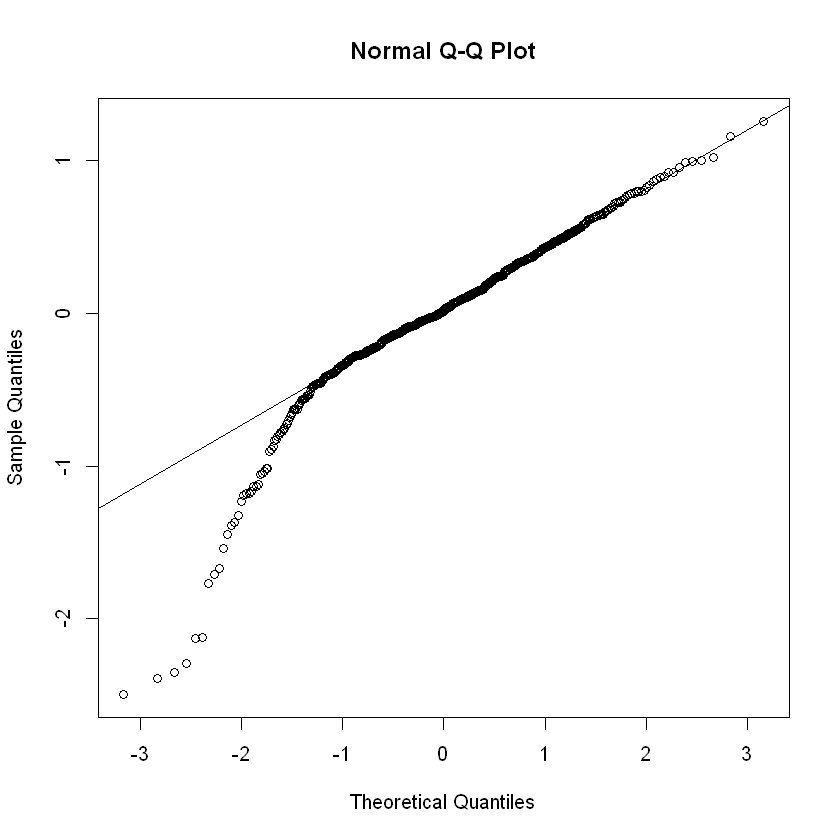

In [14]:
qqnorm(success_formula2$residuals)

qqline(success_formula2$residuals)

The model clearly shows a heavy left left skew, as evident in the histogram. This observation is also supported by the quantiles plot.

## Part 5: Prediction

I will be using the 2016 movie Deadpool for testing our model.

In [15]:
newDf <- data.frame(audience_score = 90, critics_score = 84, oscar_win = "no")
newDf

audience_score,critics_score,oscar_win
<dbl>,<dbl>,<fct>
90,84,no


In [16]:
predict(success_formula2, newDf, interval = "prediction", level = 0.95, se.fit = TRUE)

,fit,lwr,upr
1,7.726227,6.766776,8.685679


The predicted rating of the movie is 7.72, with 95% prediction interval of [6.76, 8.68]. The actual rating of the movie is 8.0 which is within our prediction interval.

## Part 6: Conclusion

Our model with audience and critic rating scores as explanatory variables does a good job as a prediction model with the explanatory variable explaining aproximately 80% of the varaibility in the response variable.This being said, one should consider that there will be some amount of dependency between critic and audience score and these two will not be completly independent variables. Another important caveat that should be adhered is that the model is not good with low scores. This is evident from the quantile plots. Therefore the user should be carefull when using the model to predict imdb ratings using low audience and critics scores.